# 1) 데이터셋 합친 후 순서 섞어서 df에 저장

In [5]:
import pandas as pd

df_drowsy = pd.read_csv('./drowsy.csv')
df_non_drowsy = pd.read_csv('./non-drowsy.csv')

df = pd.concat([df_drowsy, df_non_drowsy])
df = df.sample(frac=1).reset_index(drop=True)

# 2) Train & Test 셋으로 분리

In [19]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [30]:
from sklearn.preprocessing import LabelEncoder

encoder =  LabelEncoder()
y1 = encoder.fit_transform(y)
Y = pd.get_dummies(y1).values
Y

array([[0, 1],
       [1, 0],
       [0, 1],
       ...,
       [1, 0],
       [0, 1],
       [1, 0]], dtype=uint8)

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.2, 
                                                    random_state=1) 
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((33433, 51), (8359, 51), (33433, 2), (8359, 2))

# 3) 모델 생성 후 학습

In [49]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

model = Sequential()

model.add(Dense(64,input_shape=(51,),activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(2,activation='sigmoid'))

model.compile(loss='binary_crossentropy', 
              optimizer='rmsprop', 
              metrics=['accuracy'])

model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 64)                3328      
                                                                 
 dense_31 (Dense)            (None, 64)                4160      
                                                                 
 dense_32 (Dense)            (None, 2)                 130       
                                                                 
Total params: 7,618
Trainable params: 7,618
Non-trainable params: 0
_________________________________________________________________


In [50]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=500)

Epoch 1/500
1045/1045 [==============================] - 2s 2ms/step - loss: 0.6606 - accuracy: 0.5810 - val_loss: 0.6340 - val_accuracy: 0.6270
Epoch 2/500
1045/1045 [==============================] - 2s 1ms/step - loss: 0.6066 - accuracy: 0.6279 - val_loss: 0.6135 - val_accuracy: 0.6472
Epoch 3/500
1045/1045 [==============================] - 2s 2ms/step - loss: 0.5764 - accuracy: 0.6628 - val_loss: 0.5496 - val_accuracy: 0.6789
Epoch 4/500
1045/1045 [==============================] - 2s 2ms/step - loss: 0.5429 - accuracy: 0.7007 - val_loss: 0.5012 - val_accuracy: 0.7478
Epoch 5/500
1045/1045 [==============================] - 2s 1ms/step - loss: 0.5089 - accuracy: 0.7362 - val_loss: 0.5033 - val_accuracy: 0.7380
Epoch 6/500
1045/1045 [==============================] - 2s 2ms/step - loss: 0.4807 - accuracy: 0.7575 - val_loss: 0.4377 - val_accuracy: 0.7865
Epoch 7/500
1045/1045 [==============================] - 2s 2ms/step - loss: 0.4566 - accuracy: 0.7754 - val_loss: 0.4137 - val_ac

1045/1045 [==============================] - 2s 2ms/step - loss: 0.1583 - accuracy: 0.9423 - val_loss: 0.1447 - val_accuracy: 0.9504
Epoch 58/500
1045/1045 [==============================] - 2s 1ms/step - loss: 0.1558 - accuracy: 0.9436 - val_loss: 0.1688 - val_accuracy: 0.9425
Epoch 59/500
1045/1045 [==============================] - 2s 2ms/step - loss: 0.1541 - accuracy: 0.9436 - val_loss: 0.2266 - val_accuracy: 0.9191
Epoch 60/500
1045/1045 [==============================] - 2s 2ms/step - loss: 0.1542 - accuracy: 0.9451 - val_loss: 0.1363 - val_accuracy: 0.9529
Epoch 61/500
1045/1045 [==============================] - 2s 1ms/step - loss: 0.1520 - accuracy: 0.9441 - val_loss: 0.1470 - val_accuracy: 0.9487
Epoch 62/500
1045/1045 [==============================] - 2s 2ms/step - loss: 0.1513 - accuracy: 0.9445 - val_loss: 0.1488 - val_accuracy: 0.9460
Epoch 63/500
1045/1045 [==============================] - 2s 2ms/step - loss: 0.1475 - accuracy: 0.9478 - val_loss: 0.1360 - val_accuracy

1045/1045 [==============================] - 2s 2ms/step - loss: 0.1001 - accuracy: 0.9652 - val_loss: 0.1121 - val_accuracy: 0.9648
Epoch 114/500
1045/1045 [==============================] - 2s 2ms/step - loss: 0.0991 - accuracy: 0.9658 - val_loss: 0.1319 - val_accuracy: 0.9559
Epoch 115/500
1045/1045 [==============================] - 2s 2ms/step - loss: 0.1007 - accuracy: 0.9647 - val_loss: 0.1115 - val_accuracy: 0.9649
Epoch 116/500
1045/1045 [==============================] - 2s 2ms/step - loss: 0.0996 - accuracy: 0.9652 - val_loss: 0.0920 - val_accuracy: 0.9718
Epoch 117/500
1045/1045 [==============================] - 2s 2ms/step - loss: 0.0988 - accuracy: 0.9658 - val_loss: 0.0934 - val_accuracy: 0.9693
Epoch 118/500
1045/1045 [==============================] - 2s 2ms/step - loss: 0.0960 - accuracy: 0.9671 - val_loss: 0.1382 - val_accuracy: 0.9535
Epoch 119/500
1045/1045 [==============================] - 2s 2ms/step - loss: 0.0950 - accuracy: 0.9670 - val_loss: 0.1352 - val_ac

Epoch 169/500
1045/1045 [==============================] - 2s 2ms/step - loss: 0.0767 - accuracy: 0.9741 - val_loss: 0.0875 - val_accuracy: 0.9746
Epoch 170/500
1045/1045 [==============================] - 2s 2ms/step - loss: 0.0770 - accuracy: 0.9736 - val_loss: 0.0703 - val_accuracy: 0.9783
Epoch 171/500
1045/1045 [==============================] - 2s 2ms/step - loss: 0.0795 - accuracy: 0.9732 - val_loss: 0.0871 - val_accuracy: 0.9734
Epoch 172/500
1045/1045 [==============================] - 2s 2ms/step - loss: 0.0781 - accuracy: 0.9743 - val_loss: 0.0728 - val_accuracy: 0.9767
Epoch 173/500
1045/1045 [==============================] - 2s 2ms/step - loss: 0.0798 - accuracy: 0.9735 - val_loss: 0.0701 - val_accuracy: 0.9805
Epoch 174/500
1045/1045 [==============================] - 2s 2ms/step - loss: 0.0775 - accuracy: 0.9745 - val_loss: 0.0745 - val_accuracy: 0.9762
Epoch 175/500
1045/1045 [==============================] - 2s 2ms/step - loss: 0.0753 - accuracy: 0.9745 - val_loss: 0

Epoch 225/500
1045/1045 [==============================] - 2s 2ms/step - loss: 0.0679 - accuracy: 0.9787 - val_loss: 0.0828 - val_accuracy: 0.9751
Epoch 226/500
1045/1045 [==============================] - 2s 2ms/step - loss: 0.0698 - accuracy: 0.9779 - val_loss: 0.1210 - val_accuracy: 0.9652
Epoch 227/500
1045/1045 [==============================] - 2s 2ms/step - loss: 0.0650 - accuracy: 0.9791 - val_loss: 0.0683 - val_accuracy: 0.9800
Epoch 228/500
1045/1045 [==============================] - 2s 2ms/step - loss: 0.0671 - accuracy: 0.9791 - val_loss: 0.0884 - val_accuracy: 0.9762
Epoch 229/500
1045/1045 [==============================] - 2s 2ms/step - loss: 0.0650 - accuracy: 0.9800 - val_loss: 0.1153 - val_accuracy: 0.9658
Epoch 230/500
1045/1045 [==============================] - 2s 2ms/step - loss: 0.0659 - accuracy: 0.9782 - val_loss: 0.0664 - val_accuracy: 0.9797
Epoch 231/500
1045/1045 [==============================] - 2s 2ms/step - loss: 0.0654 - accuracy: 0.9796 - val_loss: 0

Epoch 281/500
1045/1045 [==============================] - 2s 2ms/step - loss: 0.0602 - accuracy: 0.9807 - val_loss: 0.1095 - val_accuracy: 0.9671
Epoch 282/500
1045/1045 [==============================] - 2s 2ms/step - loss: 0.0621 - accuracy: 0.9812 - val_loss: 0.0752 - val_accuracy: 0.9810
Epoch 283/500
1045/1045 [==============================] - 2s 2ms/step - loss: 0.0592 - accuracy: 0.9813 - val_loss: 0.0578 - val_accuracy: 0.9819
Epoch 284/500
1045/1045 [==============================] - 2s 2ms/step - loss: 0.0597 - accuracy: 0.9815 - val_loss: 0.0855 - val_accuracy: 0.9776
Epoch 285/500
1045/1045 [==============================] - 2s 2ms/step - loss: 0.0623 - accuracy: 0.9806 - val_loss: 0.0713 - val_accuracy: 0.9811
Epoch 286/500
1045/1045 [==============================] - 2s 2ms/step - loss: 0.0606 - accuracy: 0.9808 - val_loss: 0.0721 - val_accuracy: 0.9793
Epoch 287/500
1045/1045 [==============================] - 2s 2ms/step - loss: 0.0619 - accuracy: 0.9817 - val_loss: 0

Epoch 337/500
1045/1045 [==============================] - 2s 2ms/step - loss: 0.0541 - accuracy: 0.9835 - val_loss: 0.0663 - val_accuracy: 0.9822
Epoch 338/500
1045/1045 [==============================] - 2s 2ms/step - loss: 0.0520 - accuracy: 0.9832 - val_loss: 0.0764 - val_accuracy: 0.9774
Epoch 339/500
1045/1045 [==============================] - 2s 2ms/step - loss: 0.0555 - accuracy: 0.9827 - val_loss: 0.0730 - val_accuracy: 0.9812
Epoch 340/500
1045/1045 [==============================] - 2s 2ms/step - loss: 0.0562 - accuracy: 0.9825 - val_loss: 0.0472 - val_accuracy: 0.9853
Epoch 341/500
1045/1045 [==============================] - 2s 2ms/step - loss: 0.0557 - accuracy: 0.9830 - val_loss: 0.0655 - val_accuracy: 0.9811
Epoch 342/500
1045/1045 [==============================] - 2s 2ms/step - loss: 0.0555 - accuracy: 0.9834 - val_loss: 0.0747 - val_accuracy: 0.9797
Epoch 343/500
1045/1045 [==============================] - 2s 2ms/step - loss: 0.0551 - accuracy: 0.9830 - val_loss: 0

Epoch 393/500
1045/1045 [==============================] - 2s 2ms/step - loss: 0.0570 - accuracy: 0.9836 - val_loss: 0.0913 - val_accuracy: 0.9761
Epoch 394/500
1045/1045 [==============================] - 2s 2ms/step - loss: 0.0519 - accuracy: 0.9844 - val_loss: 0.0637 - val_accuracy: 0.9858
Epoch 395/500
1045/1045 [==============================] - 2s 2ms/step - loss: 0.0524 - accuracy: 0.9850 - val_loss: 0.0742 - val_accuracy: 0.9813
Epoch 396/500
1045/1045 [==============================] - 2s 2ms/step - loss: 0.0543 - accuracy: 0.9835 - val_loss: 0.0579 - val_accuracy: 0.9859
Epoch 397/500
1045/1045 [==============================] - 2s 2ms/step - loss: 0.0521 - accuracy: 0.9842 - val_loss: 0.0684 - val_accuracy: 0.9823
Epoch 398/500
1045/1045 [==============================] - 2s 2ms/step - loss: 0.0536 - accuracy: 0.9838 - val_loss: 0.1088 - val_accuracy: 0.9690
Epoch 399/500
1045/1045 [==============================] - 2s 2ms/step - loss: 0.0542 - accuracy: 0.9841 - val_loss: 0

Epoch 449/500
1045/1045 [==============================] - 2s 2ms/step - loss: 0.0509 - accuracy: 0.9852 - val_loss: 0.0784 - val_accuracy: 0.9803
Epoch 450/500
1045/1045 [==============================] - 2s 2ms/step - loss: 0.0506 - accuracy: 0.9856 - val_loss: 0.0691 - val_accuracy: 0.9813
Epoch 451/500
1045/1045 [==============================] - 2s 2ms/step - loss: 0.0508 - accuracy: 0.9844 - val_loss: 0.0474 - val_accuracy: 0.9898
Epoch 452/500
1045/1045 [==============================] - 2s 2ms/step - loss: 0.0492 - accuracy: 0.9849 - val_loss: 0.0669 - val_accuracy: 0.9829
Epoch 453/500
1045/1045 [==============================] - 2s 2ms/step - loss: 0.0515 - accuracy: 0.9859 - val_loss: 0.0531 - val_accuracy: 0.9874
Epoch 454/500
1045/1045 [==============================] - 2s 2ms/step - loss: 0.0491 - accuracy: 0.9858 - val_loss: 0.0853 - val_accuracy: 0.9788
Epoch 455/500
1045/1045 [==============================] - 2s 2ms/step - loss: 0.0514 - accuracy: 0.9849 - val_loss: 0

# 4) 학습 정확도 측정

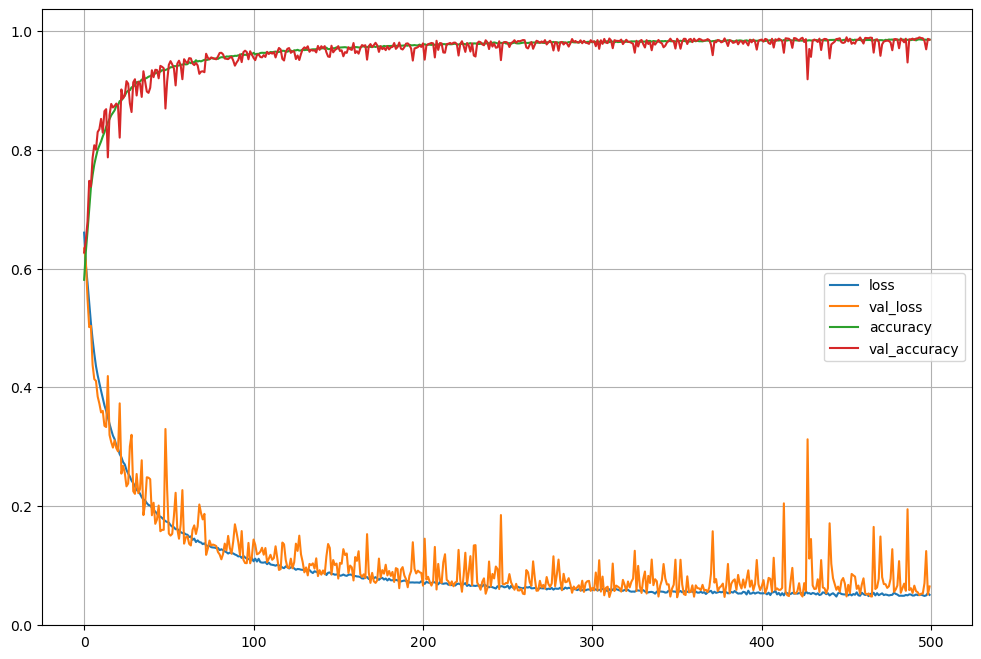

In [51]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['loss','val_loss', 'accuracy','val_accuracy'])
plt.grid()
plt.show()

In [52]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Accuracy = {:.2f}".format(accuracy))

262/262 [==============================] - 0s 2ms/step - loss: 0.0642 - accuracy: 0.9856
Accuracy = 0.99


In [65]:
X_test.shape

(8359, 51)

# 5) 실제 이미지로 테스트

In [188]:
import cv2
image = cv2.imread("../../Datasets/Non-Drowsy/nd_00001.png")

In [189]:
from mediapipe.framework.formats import landmark_pb2
import mediapipe as mp
import numpy as np

mp_face_mesh = mp.solutions.face_mesh

with mp_face_mesh.FaceMesh(max_num_faces=1, refine_landmarks=True, min_detection_confidence=0.5, min_tracking_confidence=0.5) as face_mesh:
    image.flags.writeable = False
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = face_mesh.process(image)

    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
    if results.multi_face_landmarks:
        face_landmarks = results.multi_face_landmarks[0]
        point_list = [face_landmarks.landmark[46], face_landmarks.landmark[53], face_landmarks.landmark[52], face_landmarks.landmark[55], face_landmarks.landmark[65],   
                        face_landmarks.landmark[276], face_landmarks.landmark[283], face_landmarks.landmark[282], face_landmarks.landmark[295], face_landmarks.landmark[285],
                        face_landmarks.landmark[160], face_landmarks.landmark[158],
                       face_landmarks.landmark[385], face_landmarks.landmark[387],
                        face_landmarks.landmark[61], face_landmarks.landmark[291], face_landmarks.landmark[17]]
            
        temp = []
        for i, points in enumerate(point_list):
            temp.append(points.x)
            temp.append(points.y)
            temp.append(points.z)
        temp = np.array(temp).reshape(1, 51)
        
        classes = model.predict(temp.reshape(1, 51))[0]
        if(classes[0] < classes[1]):
            print("Drowsy", classes)
        else:
            print("Non-Drowsy", classes)

1/1 [==============================] - 0s 32ms/step
Non-Drowsy [0.824702   0.17108692]


# 6) 실시간 이미지 테스트

In [190]:
cap = cv2.VideoCapture(0)
with mp_face_mesh.FaceMesh(max_num_faces=2, refine_landmarks=True, min_detection_confidence=0.5, min_tracking_confidence=0.5) as face_mesh:
    while cap.isOpened():
        success, image = cap.read()
        
        image.flags.writeable = False
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        results = face_mesh.process(image)

        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        if results.multi_face_landmarks:
            face_landmarks = results.multi_face_landmarks[0]
            point_list = [face_landmarks.landmark[46], face_landmarks.landmark[53], face_landmarks.landmark[52], face_landmarks.landmark[55], face_landmarks.landmark[65],   
                          face_landmarks.landmark[276], face_landmarks.landmark[283], face_landmarks.landmark[282], face_landmarks.landmark[295], face_landmarks.landmark[285],
                          face_landmarks.landmark[160], face_landmarks.landmark[158],
                          face_landmarks.landmark[385], face_landmarks.landmark[387],
                          face_landmarks.landmark[61], face_landmarks.landmark[291], face_landmarks.landmark[17]]
            
            temp = []
            for i, points in enumerate(point_list):
                temp.append(points.x)
                temp.append(points.y)
                temp.append(points.z)
            temp = np.array(temp).reshape(1, 51)
        
            classes = model.predict(temp.reshape(1, 51))[0]
            cName = "Non-Drowsy"
            if(classes[0] < classes[1]):
                cName = "Drowsy"
            
            image = cv2.flip(image, 1)
            cv2.putText(image, cName, (30, 60), cv2.FONT_HERSHEY_SIMPLEX, 1, (98, 17, 0), 2, cv2.LINE_AA)
            
            cv2.imshow('MediaPipe Face Mesh', image)
            if cv2.waitKey(5) & 0xFF == 27:
                break
                
cv2.destroyAllWindows()
cap.release()

1/1 [==============================] - 0s 34ms/step
